# New SDSSRM-XCS Relations: $M_{\rm{gas}}$-$L_{\rm{X}}$

This section of the project fits scaling relations to the measurements of properties made in the first paper of this series [(Turner et al. 2024)](https://ui.adsabs.harvard.edu/abs/2025MNRAS.tmp...10T/abstract).

Here we focus on scaling relations between the hot gas mass of galaxy clusters and groups ($M_{\rm{gas}}$, or $M^{\rm{gas}}_{\Delta}$ within an overdensity radius $R_{\Delta}$) and the cluster/group X-ray luminosity ($L_{\rm{X}}$, or $L^{0.5-2.0}_{\rm{X},\Delta}$ within $R_{\Delta}$ and 0.5-2.0 keV energy bounds). If present in a property name, 'ce' means 'core-excised', normally 0.15$R_{500}$. When we refer to the bolometric (with shorthand 'bol') we are talking about the entire energy range of the telescope.

Relation fits are performed using the XGA interface to the R scaling-relation fitting package LIRA, see the paper for full details.

## Import Statements

In [1]:
import pandas as pd
pd.set_option('display.max_columns', 500)
import numpy as np
from astropy.units import Quantity
from astropy.cosmology import LambdaCDM

# This adds the directory above to the path, allowing me to import the common functions that I've written in
#  common.py - this just saves me repeating boring code and makes sure its all consistent
import sys
sys.path.insert(0, '..')
from common import xcs_cosmo, lx_norm, mgas_norm

import xga
from xga.relations.fit import scaling_relation_lira

## Normalisation values

These are used when fitting the scaling relations to normalise the data, and are kept the same throughout this entire project:

In [2]:
lx_norm

<Quantity 1.e+44 erg / s>

In [3]:
mgas_norm

<Quantity 1.e+13 solMass>

## Cosmological model

We use the same cosmology as was utilised in the initial paper of this series:

In [4]:
xcs_cosmo

LambdaCDM(name=None, H0=<Quantity 70. km / (Mpc s)>, Om0=0.3, Ode0=0.7, Tcmb0=<Quantity 0. K>, Neff=3.04, m_nu=None, Ob0=None)

## Loading data files

Important considerations for this dataset:
* The X-ray cluster sample was originally assembled and analysed by [Giles et al. (2022)](https://ui.adsabs.harvard.edu/abs/2022MNRAS.516.3878G/abstract) - when we say 'SDSSRM-XCS' we are specifically referring to the volume limited ($0.1<z<0.35$) sample with fractional temperature errors of less than 25% - contains 150 clusters.
* SDSSRM-XCS is ultimately an *optically selected* sample however, as the original X-ray work (see above) found X-ray counterparts to clusters selected from the redMaPPer catalog of galaxy clusters produced from SDSS photometry [(Rykoff et al. 2014)](http://adsabs.harvard.edu/abs/2014ApJ...785..104R).
* These galaxy clusters were then further analysed in the first paper of this series [(Turner et al. 2024)](https://ui.adsabs.harvard.edu/abs/2025MNRAS.tmp...10T/abstract), measuring radial profiles of density and temperature that were used to calculate hydrostatic and gas masses.

### SDSSRM-XCS base sample

In [5]:
sdssxcs_base = pd.read_csv("../../sample_files/SDSSRM-XCS_base_sample.csv")
sdssxcs_base.head(6)

,name,MEM_MATCH_ID,xapa_ra,xapa_dec,z,r500,r500-,r500+,richness,richness_err,XCS_NAME
0,SDSSXCS-124,124,0.80058,-6.09182,0.2475,1181.028,21.202,23.203,109.550,4.490,XMMXCS J000312.1-060530.5
1,SDSSXCS-2789,2789,0.95554,2.06802,0.1053,1007.861,17.194,17.202,38.904,2.830,XMMXCS J000349.3+020404.8
2,SDSSXCS-290,290,2.72264,29.16102,0.3485,913.052,30.879,31.210,105.096,5.994,XMMXCS J001053.4+290939.6
3,SDSSXCS-1018,1018,4.40633,-0.87619,0.2144,902.259,22.445,23.366,56.997,3.219,XMMXCS J001737.5-005234.2
4,SDSSXCS-134,134,4.90839,3.60982,0.2773,1123.321,19.219,19.226,108.604,4.792,XMMXCS J001938.0+033635.3
5,SDSSXCS-119,119,8.46470,-7.86290,0.3042,944.275,46.422,46.747,128.192,5.697,XMMXCS J003351.5-075146.4


Calculating E(z) values for these clusters:

In [6]:
sdssxcs_base['E'] = xcs_cosmo.efunc(sdssxcs_base['z'].values)

### SDSSRM-XCS $T_{\rm{X}}$ and $L_{\rm{X}}$

In [7]:
sdssxcs_txlx = pd.read_csv("../../sample_files/paper_one_results/sdssrm-xcs_txlx_v1.0.0.csv")
sdssxcs_txlx.head(6)

,name,Tx_500,Tx_500-,Tx_500+,Lx52_500,Lx52_500-,Lx52_500+,Lxbol_500,Lxbol_500-,Lxbol_500+,Tx_2500,Tx_2500-,Tx_2500+,Lx52_2500,Lx52_2500-,Lx52_2500+,Lxbol_2500,Lxbol_2500-,Lxbol_2500+,Tx_500ce,Tx_500ce-,Tx_500ce+,Lx52_500ce,Lx52_500ce-,Lx52_500ce+,Lxbol_500ce,Lxbol_500ce-,Lxbol_500ce+
0,SDSSXCS-124,6.92000,0.116389,0.111642,5.310408e+44,2.494586e+42,3.193270e+42,2.039754e+45,2.082091e+43,1.712354e+43,7.08946,0.097823,0.097929,4.008461e+44,2.163312e+42,1.887667e+42,1.557705e+45,1.278003e+43,1.166420e+43,6.78098,0.134306,0.158223,3.684827e+44,2.702225e+42,2.572964e+42,1.401501e+45,1.425781e+43,1.280567e+43
1,SDSSXCS-2789,4.54033,0.073600,0.074023,1.029575e+44,5.149604e+41,6.858712e+41,3.213527e+44,3.914562e+42,3.124017e+42,4.44237,0.057404,0.057774,7.125319e+43,4.164749e+41,3.793543e+41,2.201238e+44,1.767406e+42,1.642524e+42,4.65452,0.108600,0.113677,6.943669e+43,6.482835e+41,5.773788e+41,2.192642e+44,2.960496e+42,2.652251e+42
2,SDSSXCS-290,5.31681,0.297854,0.336308,2.856695e+44,5.917234e+42,7.322989e+42,9.632533e+44,4.005991e+43,3.207763e+43,5.41431,0.259989,0.309605,2.033267e+44,4.662931e+42,4.169953e+42,6.920658e+44,2.211700e+43,1.983518e+43,5.44819,0.407899,0.486340,1.972104e+44,6.434636e+42,6.092122e+42,6.734043e+44,3.038773e+43,2.687861e+43
3,SDSSXCS-1018,3.90154,0.143544,0.151498,8.044819e+43,1.441322e+42,9.241468e+41,2.335851e+44,6.385493e+42,4.924304e+42,4.09555,0.108381,0.115430,6.395952e+43,8.467201e+41,7.602523e+41,1.899850e+44,3.436098e+42,3.542190e+42,3.93098,0.207281,0.230478,5.048987e+43,1.253282e+42,1.066663e+42,1.471118e+44,5.740520e+42,4.871391e+42
4,SDSSXCS-134,6.72622,0.116523,0.116565,4.811899e+44,2.458557e+42,3.050440e+42,1.825296e+45,2.068757e+43,1.639058e+43,7.04643,0.104430,0.104760,3.813160e+44,2.170963e+42,1.872005e+42,1.479760e+45,1.263153e+43,1.208755e+43,6.37686,0.135837,0.153820,3.447715e+44,2.713877e+42,2.497416e+42,1.273855e+45,1.415497e+43,1.228583e+43
5,SDSSXCS-119,4.93456,0.400268,0.456173,2.049789e+44,5.182032e+42,6.885075e+42,6.654626e+44,4.141700e+43,3.282061e+43,5.41255,0.397709,0.448294,1.239172e+44,3.785057e+42,3.735144e+42,4.215892e+44,2.155310e+43,1.870703e+43,4.91222,0.432241,0.503558,1.821676e+44,5.522211e+42,5.714386e+42,5.900648e+44,3.822404e+43,2.772960e+43


### SDSSRM-XCS masses

In [8]:
sdssxcs_mass = pd.read_csv("../../sample_files/paper_one_results/sdssrm-xcs_mass_v1.0.0.csv")
sdssxcs_mass.head(6)

,name,Mhy500,Mhy500-,Mhy500+,Mg500,Mg500-,Mg500+,Mhy2500,Mhy2500-,Mhy2500+,Mg2500,Mg2500-,Mg2500+,Mhy500_wraderr,Mhy500_wraderr-,Mhy500_wraderr+,Mg500_wraderr,Mg500_wraderr-,Mg500_wraderr+,Mhy2500_wraderr,Mhy2500_wraderr-,Mhy2500_wraderr+,Mg2500_wraderr,Mg2500_wraderr-,Mg2500_wraderr+
0,SDSSXCS-124,7.634491,1.286289,1.029318,0.869914,0.002841,0.005951,2.621329,0.112240,0.137975,0.321744,0.000722,0.000734,7.635562,1.285474,1.041261,0.870390,0.015662,0.016223,2.621462,0.113380,0.138668,0.321697,0.007076,0.007250
1,SDSSXCS-2789,7.820374,1.259755,1.447212,0.218603,0.002491,0.002496,1.602926,0.101929,0.109311,0.097414,0.000324,0.000329,7.823912,1.268244,1.456225,0.218499,0.002874,0.002963,1.602810,0.102195,0.110153,0.097399,0.001819,0.001737
2,SDSSXCS-290,2.961604,0.369827,0.382523,0.427969,0.002132,0.002098,1.467429,0.175603,0.290465,0.134154,0.000759,0.000773,2.959792,0.390293,0.420849,0.427478,0.019454,0.019887,1.469441,0.177871,0.288247,0.134133,0.005839,0.005993
3,SDSSXCS-1018,5.067958,1.015270,0.969362,0.210208,0.001929,0.001917,1.128892,0.103503,0.149913,0.084371,0.000350,0.000359,5.072697,1.030805,0.973924,0.210059,0.003374,0.003431,1.128619,0.104011,0.149860,0.084350,0.002327,0.002330
4,SDSSXCS-134,6.802619,0.782566,0.772819,0.767290,0.002149,0.002170,3.043225,0.113304,0.110341,0.313945,0.000359,0.000367,6.803511,0.788996,0.781372,0.767157,0.010866,0.010814,3.042067,0.125878,0.124549,0.313911,0.007265,0.007068
5,SDSSXCS-119,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Combining tables 

In [9]:
sdssxcs_samp = pd.merge(sdssxcs_base, sdssxcs_txlx, left_on='name', right_on='name', how='outer')
sdssxcs_samp = pd.merge(sdssxcs_samp, sdssxcs_mass, left_on='name', right_on='name', how='outer')

In [10]:
sdssxcs_samp.columns

Index(['name', 'MEM_MATCH_ID', 'xapa_ra', 'xapa_dec', 'z', 'r500', 'r500-',
       'r500+', 'richness', 'richness_err', 'XCS_NAME', 'E', 'Tx_500',
       'Tx_500-', 'Tx_500+', 'Lx52_500', 'Lx52_500-', 'Lx52_500+', 'Lxbol_500',
       'Lxbol_500-', 'Lxbol_500+', 'Tx_2500', 'Tx_2500-', 'Tx_2500+',
       'Lx52_2500', 'Lx52_2500-', 'Lx52_2500+', 'Lxbol_2500', 'Lxbol_2500-',
       'Lxbol_2500+', 'Tx_500ce', 'Tx_500ce-', 'Tx_500ce+', 'Lx52_500ce',
       'Lx52_500ce-', 'Lx52_500ce+', 'Lxbol_500ce', 'Lxbol_500ce-',
       'Lxbol_500ce+', 'Mhy500', 'Mhy500-', 'Mhy500+', 'Mg500', 'Mg500-',
       'Mg500+', 'Mhy2500', 'Mhy2500-', 'Mhy2500+', 'Mg2500', 'Mg2500-',
       'Mg2500+', 'Mhy500_wraderr', 'Mhy500_wraderr-', 'Mhy500_wraderr+',
       'Mg500_wraderr', 'Mg500_wraderr-', 'Mg500_wraderr+', 'Mhy2500_wraderr',
       'Mhy2500_wraderr-', 'Mhy2500_wraderr+', 'Mg2500_wraderr',
       'Mg2500_wraderr-', 'Mg2500_wraderr+'],
      dtype='object')

In [11]:
# sdssxcs_samp = sdssxcs_samp[~sdssxcs_samp['name'].isin(['SDSSXCS-22', 'SDSSXCS-1131'])]

## Fitting scaling relations

### $M^{\rm{gas}}_{500}$-$L^{0.5-2.0}_{\rm{X,500}}$

In [12]:
# Setting up property variables in astropy quantity objects
mgas500 = Quantity(sdssxcs_samp[['Mg500_wraderr', 'Mg500_wraderr-', 'Mg500_wraderr+']].values*1e+13, 'Msun')\
    *(sdssxcs_samp['E'].values[..., None]**2)
lx500_52 = Quantity(sdssxcs_samp[['Lx52_500', 'Lx52_500-','Lx52_500+']].values, 'erg/s')

mgas500_lx52_500 = scaling_relation_lira(mgas500[:, 0], mgas500[:, 1:], lx500_52[:, 0], lx500_52[:, 1:], mgas_norm, lx_norm, 
                                         y_name=r"$E(z)^{2}M^{\rm{gas}}_{500}$", x_name=r"$L^{0.5-2.0}_{\rm{X,500}}$", 
                                         dim_hubb_ind=2, point_names=sdssxcs_samp['name'].values)
mgas500_lx52_500.model_colour = 'darkorange'
mgas500_lx52_500.author = 'Turner et al.'
mgas500_lx52_500.year = 2025
mgas500_lx52_500.name = r'Turner et al. $E(z)^{2}M^{\rm{gas}}_{500}$-$L^{0.5-2.0}_{\rm{X,500}}$'
mgas500_lx52_500.save("../../outputs/scaling_relations/sdssrm-xcs_new/mgas-lx/turner2025_mgas500_lx52_500.xgarel")

/Users/dt237/software/anaconda3/envs/xga_env/lib/python3.12/site-packages/xga/relations/fit.py:414: UserWarning: 46 sources have NaN values or negative uncertainties and have been excluded
  third_dim_info = _fit_initialise(y_values, y_errs, x_values, x_errs, y_norm, x_norm, True, point_names,
R[write to console]: module mix loaded



  |**************************************************| 100%


/Users/dt237/software/anaconda3/envs/xga_env/lib/python3.12/site-packages/xga/relations/fit.py:450: UserWarning: 46 sources have NaN values or negative uncertainties and have been excluded
  throw_away, sec_throw_away = _fit_initialise(y_values, y_errs, x_values, x_errs, y_norm, x_norm)


In [13]:
print("Slope of {v:.3f} ± {e:.3f}\n".format(v=mgas500_lx52_500.pars[0][0], e=mgas500_lx52_500.pars[0][1]))
print("Normalisation of {v:.3f} ± {e:.3f}\n".format(v=mgas500_lx52_500.pars[1][0], e=mgas500_lx52_500.pars[1][1]))
print("Scatter of {v:.3f} ± {e:.3f}".format(v=mgas500_lx52_500.scatter_par[0], e=mgas500_lx52_500.scatter_par[1]))

Slope of 0.746 ± 0.035

Normalisation of 0.291 ± 0.013

Scatter of 0.183 ± 0.013


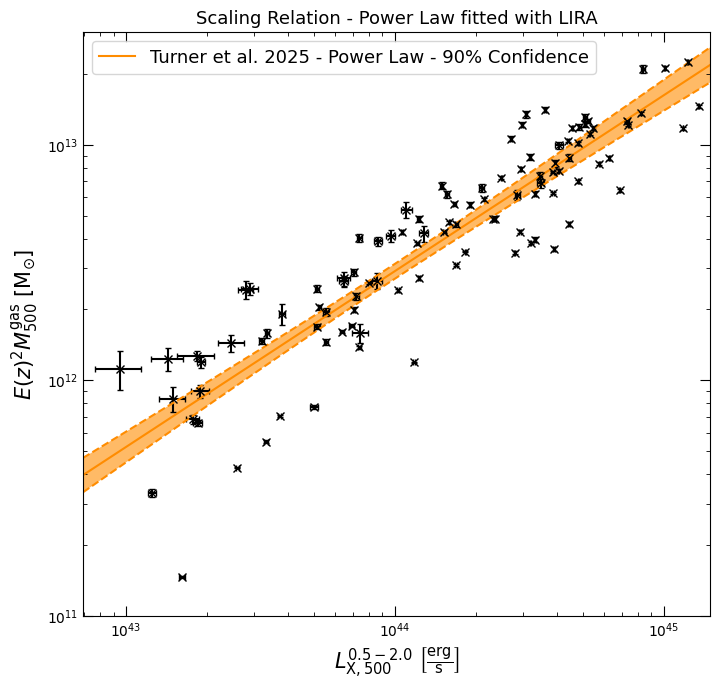

In [14]:
mgas500_lx52_500.view(figsize=(7.3, 7), y_lims=Quantity([1e+11, 3e+13], 'Msun'), 
                      save_path="../../outputs/figures/scaling_relations/sdssrm-xcs_new/mgas-lx/turner2025_mgas500_lx52_500.pdf")

### $M^{\rm{tot}}_{500}$-$L^{0.5-2.0}_{\rm{X,500ce}}$

In [15]:
# Setting up property variables in astropy quantity objects
mgas500 = Quantity(sdssxcs_samp[['Mg500_wraderr', 'Mg500_wraderr-', 'Mg500_wraderr+']].values*1e+13, 'Msun')\
    *(sdssxcs_samp['E'].values[..., None]**2)
lx500ce_52 = Quantity(sdssxcs_samp[['Lx52_500ce', 'Lx52_500ce-','Lx52_500ce+']].values, 'erg/s')

mgas500_lx52_500ce = scaling_relation_lira(mgas500[:, 0], mgas500[:, 1:], lx500ce_52[:, 0], lx500ce_52[:, 1:], mgas_norm, lx_norm, 
                                           y_name=r"$E(z)^{2}M^{\rm{gas}}_{500}$", x_name=r"$L^{0.5-2.0}_{\rm{X,500ce}}$", 
                                           dim_hubb_ind=2, point_names=sdssxcs_samp['name'].values)
mgas500_lx52_500ce.model_colour = 'rosybrown'
mgas500_lx52_500ce.author = 'Turner et al.'
mgas500_lx52_500ce.year = 2025
mgas500_lx52_500ce.name = r'Turner et al. $E(z)^{2}M^{\rm{gas}}_{500}$-$L^{0.5-2.0}_{\rm{X,500ce}}$'
mgas500_lx52_500ce.save("../../outputs/scaling_relations/sdssrm-xcs_new/mgas-lx/turner2025_mgas500_lx52_500ce.xgarel")

/Users/dt237/software/anaconda3/envs/xga_env/lib/python3.12/site-packages/xga/relations/fit.py:414: UserWarning: 46 sources have NaN values or negative uncertainties and have been excluded
  third_dim_info = _fit_initialise(y_values, y_errs, x_values, x_errs, y_norm, x_norm, True, point_names,


  |**************************************************| 100%


/Users/dt237/software/anaconda3/envs/xga_env/lib/python3.12/site-packages/xga/relations/fit.py:450: UserWarning: 46 sources have NaN values or negative uncertainties and have been excluded
  throw_away, sec_throw_away = _fit_initialise(y_values, y_errs, x_values, x_errs, y_norm, x_norm)


In [16]:
print("Slope of {v:.3f} ± {e:.3f}\n".format(v=mgas500_lx52_500ce.pars[0][0], e=mgas500_lx52_500ce.pars[0][1]))
print("Normalisation of {v:.3f} ± {e:.3f}\n".format(v=mgas500_lx52_500ce.pars[1][0], e=mgas500_lx52_500ce.pars[1][1]))
print("Scatter of {v:.3f} ± {e:.3f}".format(v=mgas500_lx52_500ce.scatter_par[0], e=mgas500_lx52_500ce.scatter_par[1]))

Slope of 0.826 ± 0.033

Normalisation of 0.381 ± 0.014

Scatter of 0.155 ± 0.011


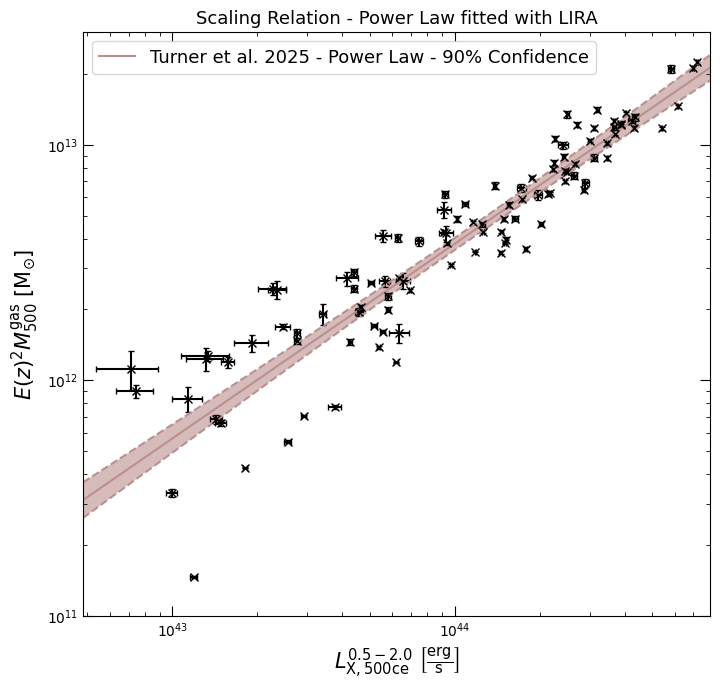

In [17]:
mgas500_lx52_500ce.view(figsize=(7.3, 7), y_lims=Quantity([1e+11, 3e+13], 'Msun'), 
                        save_path="../../outputs/figures/scaling_relations/sdssrm-xcs_new/mgas-lx/turner2025_mgas500_lx52_500ce.pdf")

### $M^{\rm{tot}}_{500}$-$L^{\rm{bol}}_{\rm{X,500}}$

In [18]:
# Setting up property variables in astropy quantity objects
mgas500 = Quantity(sdssxcs_samp[['Mg500_wraderr', 'Mg500_wraderr-', 'Mg500_wraderr+']].values*1e+13, 'Msun')\
    *(sdssxcs_samp['E'].values[..., None]**2)
lx500_bol = Quantity(sdssxcs_samp[['Lxbol_500', 'Lxbol_500-','Lxbol_500+']].values, 'erg/s')

mgas500_lxbol_500 = scaling_relation_lira(mgas500[:, 0], mgas500[:, 1:], lx500_bol[:, 0], lx500_bol[:, 1:], mgas_norm, lx_norm, 
                                          y_name=r"$E(z)^{2}M^{\rm{gas}}_{500}$", x_name=r"$L^{\rm{bol}}_{\rm{X,500}}$", 
                                          dim_hubb_ind=2, point_names=sdssxcs_samp['name'].values)
mgas500_lxbol_500.model_colour = 'darkgreen'
mgas500_lxbol_500.author = 'Turner et al.'
mgas500_lxbol_500.year = 2025
mgas500_lxbol_500.name = r'Turner et al. $E(z)^{2}M^{\rm{gas}}_{500}$-$L^{\rm{bol}}_{\rm{X,500}}$'
mgas500_lxbol_500.save("../../outputs/scaling_relations/sdssrm-xcs_new/mgas-lx/turner2025_mgas500_lxbol_500.xgarel")

/Users/dt237/software/anaconda3/envs/xga_env/lib/python3.12/site-packages/xga/relations/fit.py:414: UserWarning: 46 sources have NaN values or negative uncertainties and have been excluded
  third_dim_info = _fit_initialise(y_values, y_errs, x_values, x_errs, y_norm, x_norm, True, point_names,


  |**************************************************| 100%


/Users/dt237/software/anaconda3/envs/xga_env/lib/python3.12/site-packages/xga/relations/fit.py:450: UserWarning: 46 sources have NaN values or negative uncertainties and have been excluded
  throw_away, sec_throw_away = _fit_initialise(y_values, y_errs, x_values, x_errs, y_norm, x_norm)


In [19]:
print("Slope of {v:.3f} ± {e:.3f}\n".format(v=mgas500_lxbol_500.pars[0][0], e=mgas500_lxbol_500.pars[0][1]))
print("Normalisation of {v:.3f} ± {e:.3f}\n".format(v=mgas500_lxbol_500.pars[1][0], e=mgas500_lxbol_500.pars[1][1]))
print("Scatter of {v:.3f} ± {e:.3f}".format(v=mgas500_lxbol_500.scatter_par[0], e=mgas500_lxbol_500.scatter_par[1]))

Slope of 0.659 ± 0.030

Normalisation of 0.141 ± 0.009

Scatter of 0.176 ± 0.013


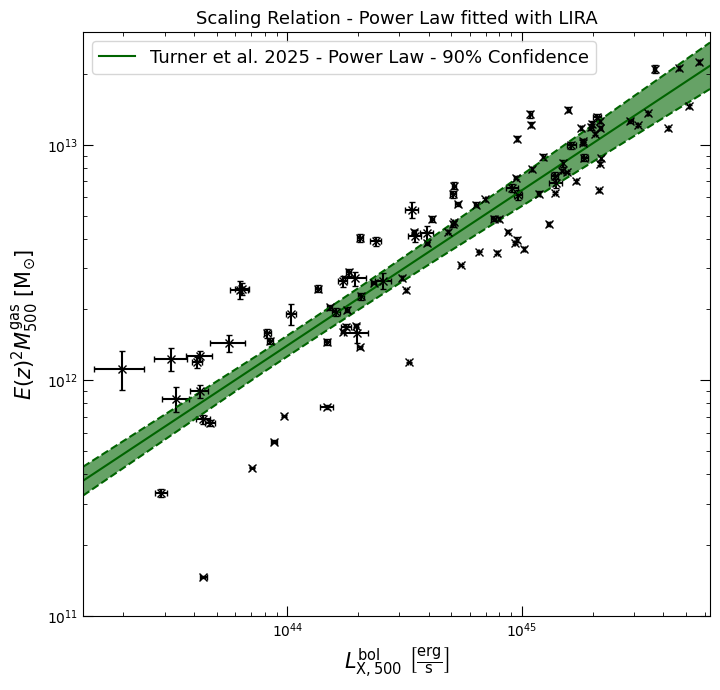

In [20]:
mgas500_lxbol_500.view(figsize=(7.3, 7), y_lims=Quantity([1e+11, 3e+13], 'Msun'), 
                       save_path="../../outputs/figures/scaling_relations/sdssrm-xcs_new/mgas-lx/turner2025_mgas500_lxbol_500.pdf")

### $M^{\rm{tot}}_{500}$-$L^{\rm{bol}}_{\rm{X,500ce}}$

In [21]:
# Setting up property variables in astropy quantity objects
mgas500 = Quantity(sdssxcs_samp[['Mg500_wraderr', 'Mg500_wraderr-', 'Mg500_wraderr+']].values*1e+13, 'Msun')\
    *(sdssxcs_samp['E'].values[..., None]**2)
lx500ce_bol = Quantity(sdssxcs_samp[['Lxbol_500ce', 'Lxbol_500ce-','Lxbol_500ce+']].values, 'erg/s')

mgas500_lxbol_500ce = scaling_relation_lira(mgas500[:, 0], mgas500[:, 1:], lx500ce_bol[:, 0], lx500ce_bol[:, 1:], mgas_norm, lx_norm, 
                                          y_name=r"$E(z)^{2}M^{\rm{gas}}_{500}$", x_name=r"$L^{\rm{bol}}_{\rm{X,500ce}}$", 
                                          dim_hubb_ind=2, point_names=sdssxcs_samp['name'].values)
mgas500_lxbol_500ce.model_colour = 'lightseagreen'
mgas500_lxbol_500ce.author = 'Turner et al.'
mgas500_lxbol_500ce.year = 2025
mgas500_lxbol_500ce.name = r'Turner et al. $E(z)^{2}M^{\rm{gas}}_{500}$-$L^{\rm{bol}}_{\rm{X,500ce}}$'
mgas500_lxbol_500ce.save("../../outputs/scaling_relations/sdssrm-xcs_new/mgas-lx/turner2025_mgas500_lxbol_500ce.xgarel")

/Users/dt237/software/anaconda3/envs/xga_env/lib/python3.12/site-packages/xga/relations/fit.py:414: UserWarning: 46 sources have NaN values or negative uncertainties and have been excluded
  third_dim_info = _fit_initialise(y_values, y_errs, x_values, x_errs, y_norm, x_norm, True, point_names,


  |**************************************************| 100%


/Users/dt237/software/anaconda3/envs/xga_env/lib/python3.12/site-packages/xga/relations/fit.py:450: UserWarning: 46 sources have NaN values or negative uncertainties and have been excluded
  throw_away, sec_throw_away = _fit_initialise(y_values, y_errs, x_values, x_errs, y_norm, x_norm)


In [22]:
print("Slope of {v:.3f} ± {e:.3f}\n".format(v=mgas500_lxbol_500ce.pars[0][0], e=mgas500_lxbol_500ce.pars[0][1]))
print("Normalisation of {v:.3f} ± {e:.3f}\n".format(v=mgas500_lxbol_500ce.pars[1][0], e=mgas500_lxbol_500ce.pars[1][1]))
print("Scatter of {v:.3f} ± {e:.3f}".format(v=mgas500_lxbol_500ce.scatter_par[0], e=mgas500_lxbol_500ce.scatter_par[1]))

Slope of 0.712 ± 0.029

Normalisation of 0.168 ± 0.008

Scatter of 0.158 ± 0.012


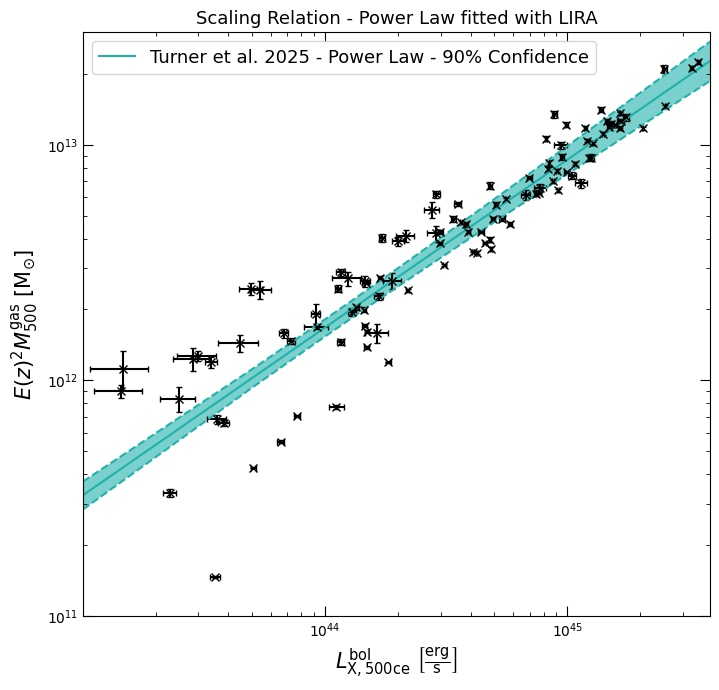

In [23]:
mgas500_lxbol_500ce.view(figsize=(7.3, 7), y_lims=Quantity([1e+11, 3e+13], 'Msun'), 
                         save_path="../../outputs/figures/scaling_relations/sdssrm-xcs_new/mgas-lx/turner2025_mgas500_lxbol_500ce.pdf")

### $M^{\rm{tot}}_{2500}$-$L^{0.5-2.0}_{\rm{X,2500}}$

In [24]:
# Setting up property variables in astropy quantity objects
mgas2500 = Quantity(sdssxcs_samp[['Mg2500_wraderr', 'Mg2500_wraderr-', 'Mg2500_wraderr+']].values*1e+13, 'Msun')\
    *(sdssxcs_samp['E'].values[..., None]**2)
lx2500_52 = Quantity(sdssxcs_samp[['Lx52_2500', 'Lx52_2500-','Lx52_2500+']].values, 'erg/s')

mgas2500_lx52_2500 = scaling_relation_lira(mgas2500[:, 0], mgas2500[:, 1:], lx2500_52[:, 0], lx2500_52[:, 1:], mgas_norm, lx_norm, 
                                           y_name=r"$E(z)^{2}M^{\rm{gas}}_{2500}$", x_name=r"$L^{0.5-2.0}_{\rm{X,2500}}$", 
                                           dim_hubb_ind=2, point_names=sdssxcs_samp['name'].values)
mgas2500_lx52_2500.model_colour = 'orchid'
mgas2500_lx52_2500.author = 'Turner et al.'
mgas2500_lx52_2500.year = 2025
mgas2500_lx52_2500.name = r'Turner et al. $E(z)^{2}M^{\rm{gas}}_{2500}$-$L^{0.5-2.0}_{\rm{X,2500}}$'
mgas2500_lx52_2500.save("../../outputs/scaling_relations/sdssrm-xcs_new/mgas-lx/turner2025_mgas2500_lx52_2500.xgarel")

/Users/dt237/software/anaconda3/envs/xga_env/lib/python3.12/site-packages/xga/relations/fit.py:414: UserWarning: 59 sources have NaN values or negative uncertainties and have been excluded
  third_dim_info = _fit_initialise(y_values, y_errs, x_values, x_errs, y_norm, x_norm, True, point_names,


  |**************************************************| 100%


/Users/dt237/software/anaconda3/envs/xga_env/lib/python3.12/site-packages/xga/relations/fit.py:450: UserWarning: 59 sources have NaN values or negative uncertainties and have been excluded
  throw_away, sec_throw_away = _fit_initialise(y_values, y_errs, x_values, x_errs, y_norm, x_norm)


In [25]:
print("Slope of {v:.3f} ± {e:.3f}\n".format(v=mgas2500_lx52_2500.pars[0][0], e=mgas2500_lx52_2500.pars[0][1]))
print("Normalisation of {v:.3f} ± {e:.3f}\n".format(v=mgas2500_lx52_2500.pars[1][0], e=mgas2500_lx52_2500.pars[1][1]))
print("Scatter of {v:.3f} ± {e:.3f}".format(v=mgas2500_lx52_2500.scatter_par[0], e=mgas2500_lx52_2500.scatter_par[1]))

Slope of 0.711 ± 0.024

Normalisation of 0.139 ± 0.004

Scatter of 0.119 ± 0.009


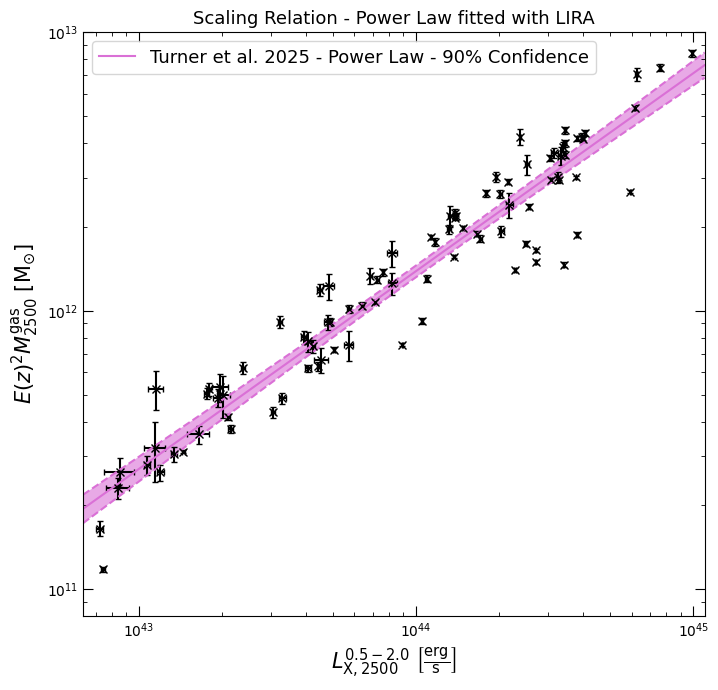

In [26]:
mgas2500_lx52_2500.view(figsize=(7.3, 7), y_lims=Quantity([0.8e+11, 1e+13], 'Msun'), 
                         save_path="../../outputs/figures/scaling_relations/sdssrm-xcs_new/mgas-lx/turner2025_mgas2500_lx52_2500.pdf")

### $M^{\rm{tot}}_{2500}$-$L^{\rm{bol}}_{\rm{X,2500}}$

In [27]:
# Setting up property variables in astropy quantity objects
mgas2500 = Quantity(sdssxcs_samp[['Mg2500_wraderr', 'Mg2500_wraderr-', 'Mg2500_wraderr+']].values*1e+13, 'Msun')\
    *(sdssxcs_samp['E'].values[..., None]**2)
lx2500_bol = Quantity(sdssxcs_samp[['Lxbol_2500', 'Lxbol_2500-','Lxbol_2500+']].values, 'erg/s')

mgas2500_lxbol_2500 = scaling_relation_lira(mgas2500[:, 0], mgas2500[:, 1:], lx2500_bol[:, 0], lx2500_bol[:, 1:], mgas_norm, lx_norm, 
                                            y_name=r"$E(z)^{2}M^{\rm{gas}}_{2500}$", x_name=r"$L^{\rm{bol}}_{\rm{X,2500}}$", 
                                            dim_hubb_ind=2, point_names=sdssxcs_samp['name'].values)
mgas2500_lxbol_2500.model_colour = 'thistle'
mgas2500_lxbol_2500.author = 'Turner et al.'
mgas2500_lxbol_2500.year = 2025
mgas2500_lxbol_2500.name = r'Turner et al. $E(z)^{2}M^{\rm{gas}}_{2500}$-$L^{\rm{bol}}_{\rm{X,2500}}$'
mgas2500_lxbol_2500.save("../../outputs/scaling_relations/sdssrm-xcs_new/mgas-lx/turner2025_mgas2500_lxbol_2500.xgarel")

/Users/dt237/software/anaconda3/envs/xga_env/lib/python3.12/site-packages/xga/relations/fit.py:414: UserWarning: 59 sources have NaN values or negative uncertainties and have been excluded
  third_dim_info = _fit_initialise(y_values, y_errs, x_values, x_errs, y_norm, x_norm, True, point_names,


  |**************************************************| 100%


/Users/dt237/software/anaconda3/envs/xga_env/lib/python3.12/site-packages/xga/relations/fit.py:450: UserWarning: 59 sources have NaN values or negative uncertainties and have been excluded
  throw_away, sec_throw_away = _fit_initialise(y_values, y_errs, x_values, x_errs, y_norm, x_norm)


In [28]:
print("Slope of {v:.3f} ± {e:.3f}\n".format(v=mgas2500_lxbol_2500.pars[0][0], e=mgas2500_lxbol_2500.pars[0][1]))
print("Normalisation of {v:.3f} ± {e:.3f}\n".format(v=mgas2500_lxbol_2500.pars[1][0], e=mgas2500_lxbol_2500.pars[1][1]))
print("Scatter of {v:.3f} ± {e:.3f}".format(v=mgas2500_lxbol_2500.scatter_par[0], e=mgas2500_lxbol_2500.scatter_par[1]))

Slope of 0.640 ± 0.018

Normalisation of 0.066 ± 0.002

Scatter of 0.098 ± 0.008


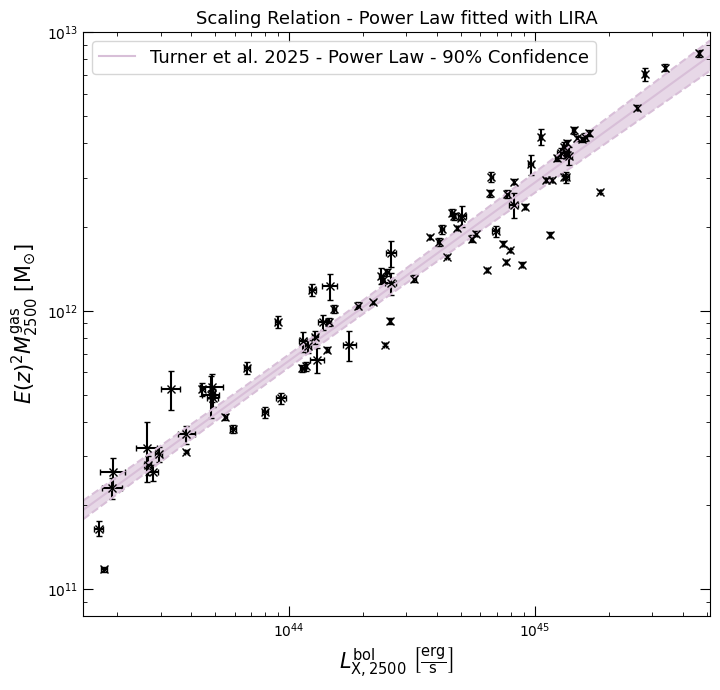

In [29]:
mgas2500_lxbol_2500.view(figsize=(7.3, 7), y_lims=Quantity([0.8e+11, 1e+13], 'Msun'), 
                         save_path="../../outputs/figures/scaling_relations/sdssrm-xcs_new/mgas-lx/turner2025_mgas2500_lxbol_2500.pdf")

### Combined contours

/Users/dt237/software/anaconda3/envs/xga_env/lib/python3.12/site-packages/xga/products/relation.py:1243: UserWarning: Not all of these ScalingRelations have the same x-axis names.
  warn('Not all of these ScalingRelations have the same x-axis names.')
/Users/dt237/software/anaconda3/envs/xga_env/lib/python3.12/site-packages/xga/products/relation.py:1250: UserWarning: Not all of these ScalingRelations have the same y-axis names.
  warn('Not all of these ScalingRelations have the same y-axis names.')


Removed no burn in
Removed no burn in
Removed no burn in
Removed no burn in
Removed no burn in
Removed no burn in


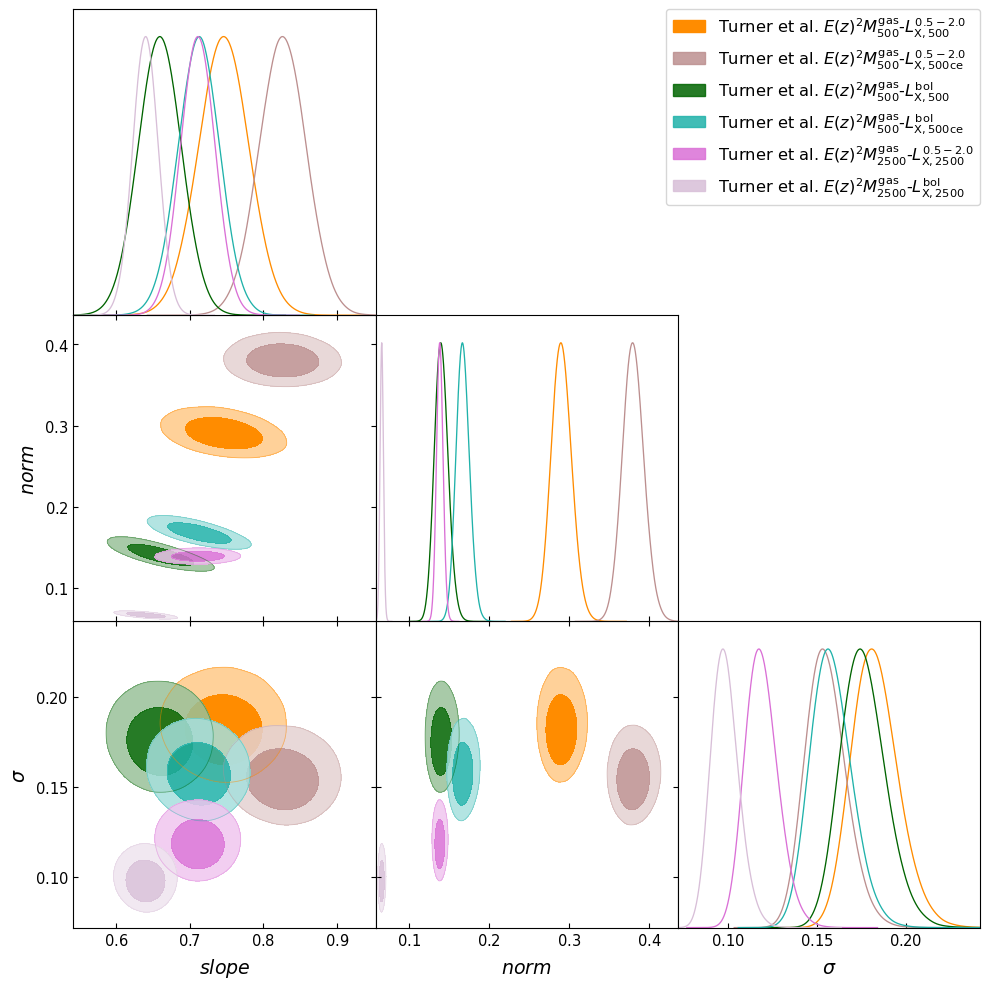

In [30]:
comb_rel = (mgas500_lx52_500 + mgas500_lx52_500ce + mgas500_lxbol_500 + mgas500_lxbol_500ce + 
            mgas2500_lx52_2500 + mgas2500_lxbol_2500)
comb_rel.view_corner(save_path="../../outputs/figures/scaling_relations/sdssrm-xcs_new/mgas-lx/turner2025_mgas_lx_contours.pdf")